In [67]:
import pandas as pd
import lightgbm as lgb
import catboost
import numpy as np
import seaborn as sns
import copy
from sklearn.preprocessing import RobustScaler

In [32]:
import matplotlib.pyplot as plt

In [33]:
trainTrue = pd.read_csv('train.csv')
fulfillmentTrue = pd.read_csv('fulfilment_center_info.csv')
mealTrue = pd.read_csv('meal_info.csv')

In [4]:
pd.merge?

In [34]:
mergedData = pd.merge(pd.merge(trainTrue, fulfillmentTrue, how="left", on="center_id"), mealTrue, how = "left", on = "meal_id")

In [35]:
mergedData.shape, trainTrue.shape, fulfillmentTrue.shape, mealTrue.shape

((456548, 15), (456548, 9), (77, 5), (51, 3))

In [36]:
mergedData.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [37]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


mergedData = mergedData.assign(discount_price = lambda x: (x.checkout_price/x.base_price))

In [38]:
mergedData.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [70]:
a = mergedData.sort_values('checkout_price')

In [39]:
mergedData['lessThan300'] = np.where(mergedData['base_price'] < 300, 1, 0)

In [40]:
mergedData['addColumn'] = mergedData['emailer_for_promotion'] + mergedData['homepage_featured'] + mergedData['lessThan300']

In [45]:
np.unique((mergedData['week'] % 4))

array([0, 1, 2, 3], dtype=int64)

In [50]:
mergedData['month'] = (mergedData['week'] // 4.3) %12
#mergedData['year'] = mergedData['week'] // 52
mergedData['weekOfMonth'] = mergedData['week'] % 5

In [43]:
mergedData.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,lessThan300,addColumn,month,year,weekOfMonth
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,1,1,0,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,1,1,0,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1,1,0,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,0,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,1,1,0,0,1


(array([61856., 40984., 31765., 19379., 14870.,  9536.,  7016.,  5765.,
         3803.]),
 array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901]),
 <a list of 9 Patch objects>)

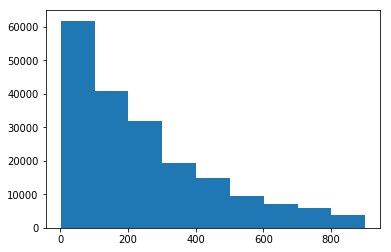

In [100]:
plt.hist(mergedData[mergedData['lessThan300'] == 1]['num_orders'], bins = [x for x in range(1, 1000, 100)])

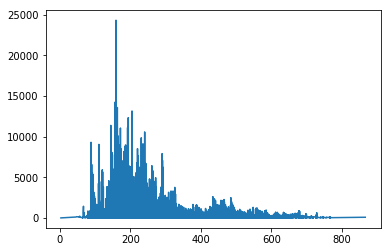

In [74]:
# a = mergedData.sort_values()
plt.plot(a['checkout_price'], a['num_orders'])

In [40]:
mergedData.hist?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017914A06470>,
      dtype=object)

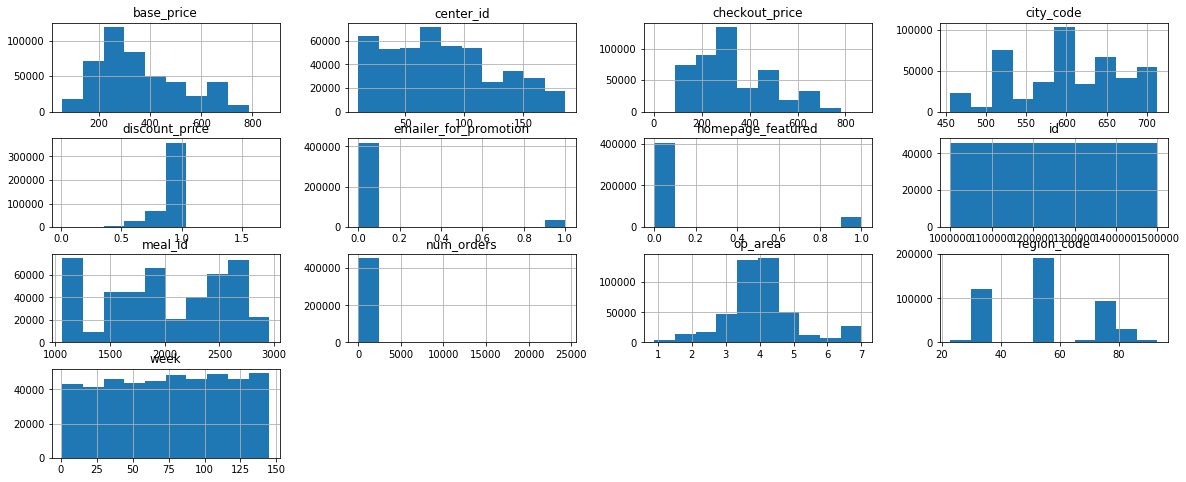

In [41]:
# plt.figure(figsize = (12,8))
(mergedData.hist(figsize=(20,8)))
# plt.show()

In [42]:
catColumns = ['center_type', 'category', 'cuisine', 'op_area', 'region_code']

for col in catColumns:
    print(col)
    print(mergedData[col].value_counts())

center_type
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64
category
Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64
cuisine
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64
op_area
4.0    52548
3.9    48533
3.8    40080
4.4    26060
4.5    25688
2.8    25503
4.1    23346
7.0    20686
4.8    18648
3.4    17258
3.6    16821
5.1    13366
4.2    12608
2.7    12430
3.0    11184
2.0     9512
6.7     7046
6.3     7015
5.6     6993
3.7     6801
3.5     6666
3.2     6333
5.0     6164
5.3     6053
4.6     5983
4.7     5975
2.4     5021
2.9     4712
1.9     4083
0.9     3432
Name: op_area, dtype: i

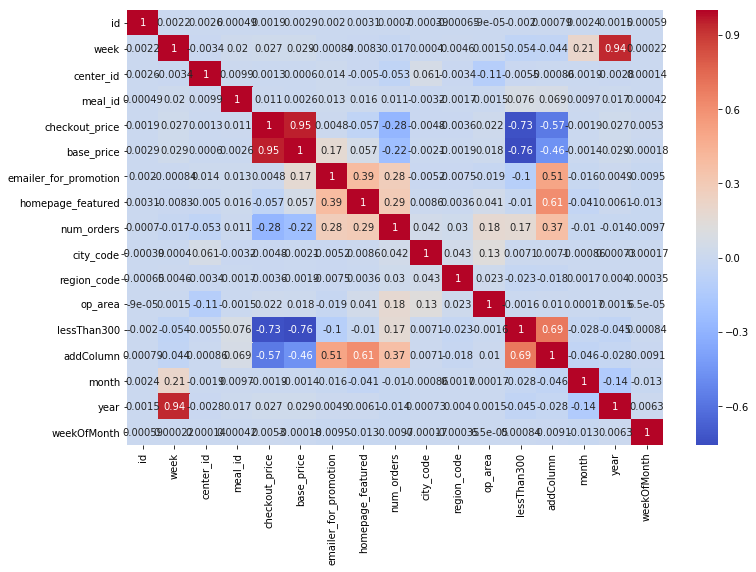

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(mergedData.corr(), cmap = "coolwarm", annot = True)
plt.show()

In [45]:


# a = mergedData['base_price']
mergedDataScaled = RobustScaler().fit_transform(mergedData['base_price'].values.reshape(-1,1))

(array([1.85370e+04, 7.07190e+04, 1.18989e+05, 8.38270e+04, 5.05950e+04,
        4.18240e+04, 2.16040e+04, 4.17020e+04, 8.74300e+03, 8.00000e+00]),
 array([-1.18451966, -0.80799554, -0.43147142, -0.0549473 ,  0.32157682,
         0.69810094,  1.07462506,  1.45114919,  1.82767331,  2.20419743,
         2.58072155]),
 <a list of 10 Patch objects>)

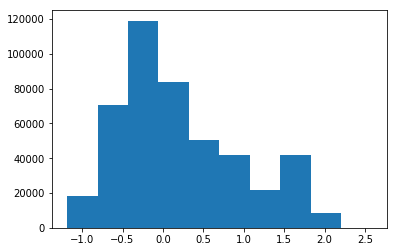

In [46]:
plt.hist(mergedDataScaled)

### Basic processing

In [52]:
mergedData.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'lessThan300', 'addColumn', 'month', 'year', 'weekOfMonth'],
      dtype='object')

In [53]:
mergedDataProcess = mergedData.drop(['base_price', 'id', 'year'], axis = 1)

In [54]:
mergedDataProcess.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,lessThan300,addColumn,month,weekOfMonth
0,1,55,1885,136.83,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,1,1,0,1
1,1,55,1993,136.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,1,1,0,1
2,1,55,2539,134.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,1,1,0,1
3,1,55,2139,339.50,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,0,0,0,1
4,1,55,2631,243.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,1,1,0,1


In [55]:
mergedDataProcess = mergedDataProcess.sample(frac=1).reset_index(drop = True)

In [56]:
dataX = mergedDataProcess.drop('num_orders', axis = 1)
dataY = mergedDataProcess['num_orders']

In [57]:
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 16 columns):
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
lessThan300              456548 non-null int32
addColumn                456548 non-null int64
month                    456548 non-null int64
weekOfMonth              456548 non-null int64
dtypes: float64(2), int32(1), int64(10), object(3)
memory usage: 54.0+ MB


In [59]:
dataX = dataX.astype({'center_id':'object', 'meal_id':'object', 'city_code':'object','region_code':'object', 
                      'op_area':'object', 'month': 'object', 'weekOfMonth': 'object'})

In [60]:
dataX = pd.get_dummies(dataX)

In [61]:
dataX.head()

,week,checkout_price,emailer_for_promotion,homepage_featured,lessThan300,addColumn,center_id_10,center_id_11,center_id_13,center_id_14,...,month_7,month_8,month_9,month_10,month_11,weekOfMonth_0,weekOfMonth_1,weekOfMonth_2,weekOfMonth_3,weekOfMonth_4
0,118,485.03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,127,339.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,18,120.28,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,122,243.53,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20,97.03,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


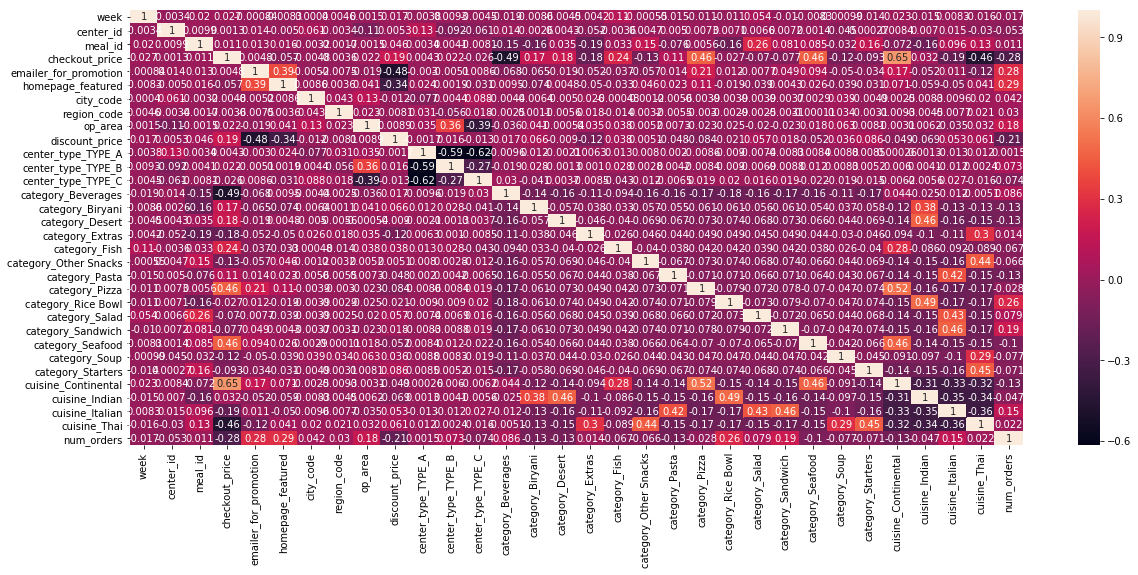

In [55]:
plt.figure(figsize=(20,8))
sns.heatmap(pd.concat([dataX, dataY], axis = 1).corr(), annot = True)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size = 0.2)

In [64]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((365238, 261), (91310, 261), (365238,), (91310,))

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rnd_reg = RandomForestRegressor()
rbs = RobustScaler().fit(X_train)
rnd_reg.fit(rbs.transform(X_train), Y_train)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50,100], 'max_depth': [10,20]}
grd_reg = GridSearchCV(RandomForestRegressor(), params, refit = True)
grd_reg.fit(rbs.transform(X_train), Y_train)

y_pred = grd_reg.predict(rbs.transform(X_test))

100 * math.sqrt(mean_squared_log_error(Y_test, y_pred))

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


54.29182929019105

In [74]:
y_pred.min()

14.336466070532744

In [73]:
grd_reg.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [69]:
y_pred = rnd_reg.predict(rbs.transform(X_test))

In [77]:
y_pred = [int(i) for i in y_pred]

In [78]:
y_pred

[112,
 366,
 559,
 117,
 260,
 203,
 187,
 523,
 350,
 54,
 152,
 126,
 256,
 80,
 95,
 296,
 29,
 32,
 354,
 303,
 297,
 57,
 164,
 45,
 185,
 119,
 865,
 327,
 1013,
 70,
 690,
 46,
 28,
 129,
 543,
 73,
 144,
 238,
 90,
 370,
 125,
 410,
 330,
 36,
 70,
 413,
 129,
 122,
 106,
 29,
 988,
 141,
 70,
 82,
 78,
 642,
 36,
 1125,
 409,
 62,
 117,
 43,
 702,
 260,
 42,
 125,
 49,
 115,
 100,
 35,
 232,
 29,
 176,
 625,
 83,
 288,
 372,
 775,
 20,
 711,
 193,
 26,
 144,
 24,
 115,
 51,
 124,
 79,
 414,
 1349,
 634,
 313,
 262,
 264,
 164,
 43,
 118,
 183,
 269,
 264,
 376,
 115,
 61,
 96,
 87,
 627,
 154,
 42,
 372,
 263,
 328,
 21,
 890,
 349,
 559,
 258,
 185,
 35,
 263,
 111,
 41,
 92,
 1049,
 261,
 107,
 119,
 49,
 43,
 119,
 125,
 125,
 552,
 42,
 37,
 172,
 589,
 322,
 175,
 164,
 35,
 49,
 198,
 617,
 1864,
 263,
 133,
 812,
 1149,
 406,
 371,
 94,
 219,
 25,
 208,
 429,
 19,
 476,
 128,
 377,
 106,
 42,
 245,
 85,
 890,
 62,
 34,
 30,
 313,
 315,
 123,
 125,
 41,
 207,
 287,
 781,

In [63]:
# Y_test

In [79]:
from sklearn.metrics import mean_squared_log_error
import math
100 * math.sqrt(mean_squared_log_error(Y_test, y_pred))

54.13673755726307

In [132]:
from xgboost import XGBRFRegressor
xgb_reg = XGBRFRegressor()
rbs = RobustScaler().fit(X_train)
xgb_reg.fit(rbs.transform(X_train), Y_train)
y_pred = xgb_reg.predict(rbs.transform(X_test))

100 * math.sqrt(mean_squared_log_error(Y_test, y_pred))

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:07:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


109.72441532121215

In [134]:
xgb_reg

XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [133]:
import datetime
datetime.datetime.now()

datetime.datetime(2019, 9, 16, 19, 10, 10, 706376)

In [70]:
from bayes_opt import BayesianOptimization


In [76]:
RandomForestRegressor?

In [ ]:
def rndForestRMLSE(max_depth,n_estimators):
#     cv = StratifiedKFold(Y, n_folds=8,shuffle=True, random_state=30)
    rnd1 = RandomForestRegressor(max_depth=int(max_depth),n_estimators=int(n_estimators))
#                                              num_leaves=int(num_leaves),reg_alpha=reg_alpha,
#                                            reg_lambda=reg_lambda)
    rnd1.fit(X_train, Y_train)
    return - 100 * math.sqrt(mean_squared_log_error(Y_test, rnd1.predict(X_test)))

rndBO = BayesianOptimization(rndForestRMLSE,{'max_depth': (4, 10),'n_estimators': (10, 1000)})
#                                   'num_leaves': (4,30),'reg_alpha': (1, 5),'reg_lambda': (0, 0.1)})

rndBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % rndBO.res['max']['max_val'])

In [78]:
testTrue = pd.read_csv('test_QoiMO9B.csv')
# mergedData = pd.merge(pd.merge(trainTrue, fulfillmentTrue, how="left", on="center_id"), mealTrue, how = "left", on = "meal_id")
testMerged = pd.merge(pd.merge(testTrue, fulfillmentTrue, how="left", on="center_id"), mealTrue, how = "left", on = "meal_id")
testMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
category                 32573 non-null object
cuisine                  32573 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ MB


In [79]:
# Data Processing Common Test and Train
testMergedProcess = testMerged.drop(['base_price', 'id'], axis = 1)
testMergedProcess = pd.get_dummies(testMergedProcess)

In [80]:
rndFull = RandomForestRegressor().fit(dataX, dataY)
testDataPred = rndFull.predict(testMergedProcess)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [87]:
testDataPred

array([130.9,  70.3, 176.8, ..., 348.4, 373.2, 182.9])

In [88]:
testTrue['num_orders'] = testDataPred

In [96]:
testTrue[['id', 'num_orders']].to_csv('Predictions.csv', index = False)